In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
path = 'dataset1/train'

In [4]:
seed =0
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
ROW, COL = 96, 96
dogs, cats = [], []
y_dogs, y_cats = [], []

# Train set 만들기

In [6]:
dog_path = os.path.join(path, 'dog.*') 

In [7]:
len(glob(dog_path))

10000

In [8]:
dog_path = os.path.join(path, 'dog.*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)  # 이미지 일고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)  # 컬러 입히고
    dog = cv2.resize(dog, (ROW, COL))  # 96 사이즈로 리사이즈
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [9]:
cat_path = os.path.join(path, 'cat.*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [10]:
classes = ['dog', 'cat']

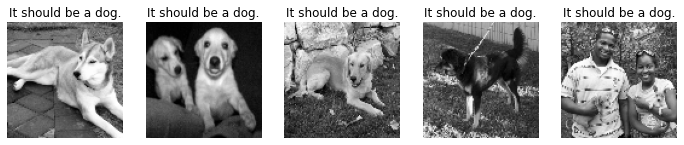

In [11]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))
plt.show()

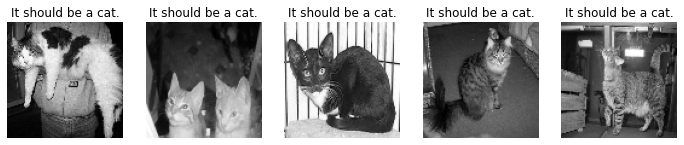

In [12]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [13]:
y_dogs =[1 for item in enumerate(dogs)]
y_cats =[0 for item in enumerate(cats)]

In [14]:
y_dogs[0], y_cats[0]

(1, 0)

In [15]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [16]:
X_train = np.concatenate((dogs,cats), axis=0)
Y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [17]:
X_train.shape, Y_train.shape

((20000, 96, 96, 1), (20000,))

# test set dag vs cat 만들기

In [18]:
path = 'dataset1/test'

In [19]:
dogs, cats = [], []    
y_dogs, y_cats = [], []

In [20]:
dog_path = os.path.join(path, 'cat.*')  
len(glob(dog_path))

2500

In [21]:
dog_path = os.path.join(path, 'dog*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)  # 이미지 일고
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)  # 컬러 입히고
    dog = cv2.resize(dog, (ROW, COL))  # 96 사이즈로 리사이즈
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [22]:
cat_path = os.path.join(path, 'cat*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [23]:
classes1 = ['dog', 'cat']

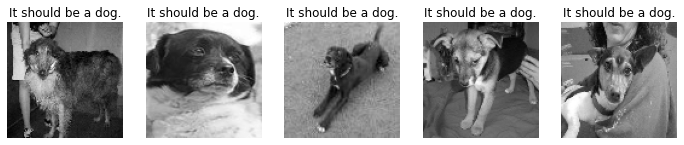

In [24]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    
    plt.axis('off')
    plt.title('It should be a {}.'.format(classes1[0]))
plt.show()

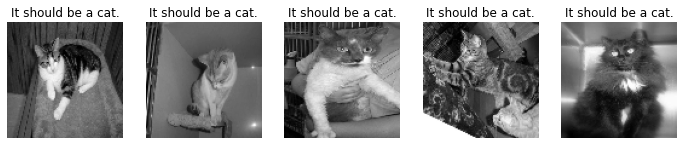

In [25]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes1[1]))
plt.show()

In [26]:
y_dogs =[1 for item in enumerate(dogs)]
y_cats =[0 for item in enumerate(cats)]

In [27]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [28]:
X_test = np.concatenate((dogs,cats), axis=0)
Y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [29]:
X_test.shape, Y_test.shape

((5000, 96, 96, 1), (5000,))

In [35]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='elu'),
    Conv2D(64, (3,3), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='elu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)       

In [36]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [37]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [38]:
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [42]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_split=0.2,
          callbacks=[checkpointer,early_stopping_callback]) 

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
15968/16000 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7308
Epoch 00001: val_loss improved from inf to 0.70853, saving model to model/dogs_vs_cats-cnn-01-0.7085.hdf5
16000/16000 [==============================] - 278s 17ms/sample - loss: 0.5364 - accuracy: 0.7308 - val_loss: 0.7085 - val_accuracy: 0.6350
Epoch 2/10
15968/16000 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.7828
Epoch 00002: val_loss improved from 0.70853 to 0.65488, saving model to model/dogs_vs_cats-cnn-02-0.6549.hdf5
16000/16000 [==============================] - 277s 17ms/sample - loss: 0.4621 - accuracy: 0.7828 - val_loss: 0.6549 - val_accuracy: 0.6605
Epoch 3/10
15968/16000 [============================>.] - ETA: 0s - loss: 0.4280 - accuracy: 0.8015
Epoch 00003: val_loss improved from 0.65488 to 0.62514, saving model to model/dogs_vs_cats-cnn-03-0.6251.hdf5
16000/16000 [==============================] 

In [43]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn-03-0.6251.hdf5')

In [44]:
scores = model.evaluate(X_test, Y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

5000/5000 - 15s - loss: 0.5134 - accuracy: 0.7636
MODEL ACCURACY: 0.76360
